# COMP 5500 Project 

## Instructions:
On this project, you can work alone or in a group of 2. Everyone needs to submit their project on ELEARN no matter it is done as a team or alone. In the report, enter the names of all the students worked in this project below. Everything(answers to questions, coding) should be done on this jupyter notebook and just submit only your <span style="color:red">jupyter notebook file</span> and submit it through eLearn. Any kind of plagiarism is prohibited. Any late submission will lose 20 points.


Please enter your name:  Mohammad Islam
Your team members name:  

## Project Description
The palmerpenguins data contains size measurements for three penguin species observed on three islands in the Palmer Archipelago, Antarctica.

The dataset consists of 8 columns.

species: penguin species (Chinstrap, Adélie, or Gentoo)<br>
bill_length_mm: bill length (mm)<br>
bill_depth_mm: bill depth (mm)<br>
flipper_length_mm: flipper length (mm)<br>
body_mass_g: body mass (g)<br>
island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)<br>
sex: penguin sex<br>
year: year<br>


## Part 1 Preparing the Data (15 Points)

Clear the data by removing all the missing data features <br>
Drop 'rowid', 'island', 'sex', 'year' <br>
Reset the index <br>
Create another data frame for pca which has only the 'bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g' <br> 
Draw a sublpot which shows all the 2D plots of the combinations of the various features (It will be a 2x3 and will show all the combinations of features such as bill_length_mm vs bill_depth_mm or bill_depth_mm vs body_mass_g <br>

Your Code:

In [62]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
from sklearn import preprocessing
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

(344, 9)


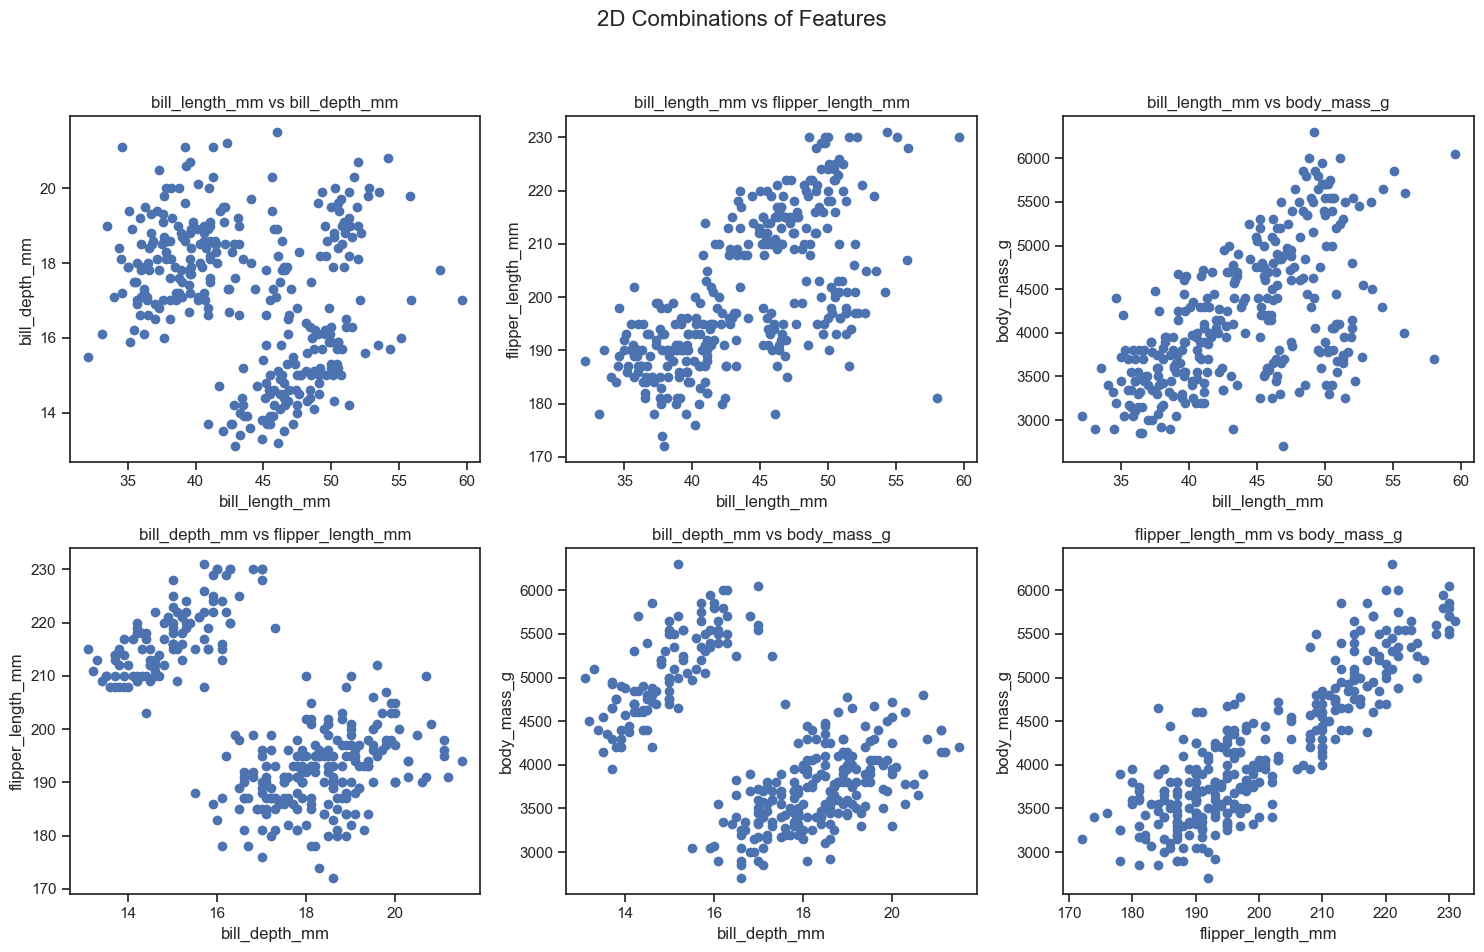

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
3,Adelie,36.7,19.3,193.0,3450.0
4,Adelie,39.3,20.6,190.0,3650.0


In [67]:

data = pd.read_csv(r'penguins.csv')
print(data.shape)
data.dropna(inplace=True)
drop_columns = ['rowid', 'island', 'sex', 'year']
data = data.drop(columns=[col for col in drop_columns if col in data.columns])
data.reset_index(drop=True, inplace=True)

pca_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
penguins_pca = data[pca_features]
sns.set(style="ticks")
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('2D Combinations of Features', fontsize=16)

feature_combinations = list(combinations(pca_features, 2))

for idx, (feature_x, feature_y) in enumerate(feature_combinations):
    row, col = divmod(idx, 3)
    axes[row, col].scatter(penguins_pca[feature_x], penguins_pca[feature_y])
    axes[row, col].set_xlabel(feature_x)
    axes[row, col].set_ylabel(feature_y)
    axes[row, col].set_title(f'{feature_x} vs {feature_y}')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
data.head()

#### Discuss which of the two features are good to be used to classify between ALL SPECIES by only looking at the graphs? 


By analyzing the scatter plots, the feature pairs of Flipper Length vs. Body Mass and Bill Length vs. Bill Depth stand out as the most effective for classifying all penguin species. These combinations display clear clustering patterns, with Gentoo penguins characterized by larger body mass and flipper length, while Adelie and Chinstrap penguins can be differentiated based on variations in their bill dimensions. Conversely, other combinations, such as Bill Length vs. Flipper Length, reveal considerable overlap, rendering them less effective for classification. Overall, these two feature pairs offer the best distinction for identifying the different penguin species.

Your Answer: 

## Part 2 PCA  (15 Points)
Assume that you need to do the dimension reduction for the classification mentioned in Part 1 <br>
Find and figure out how many principal components are needed to satisfy the variation rule of 95% <br>
Draw a 2-D and 3-D graphs using the best principal components (choose best 2 principal components for 2D and choose best 3 for the 3D plots)  <br>
Your code:

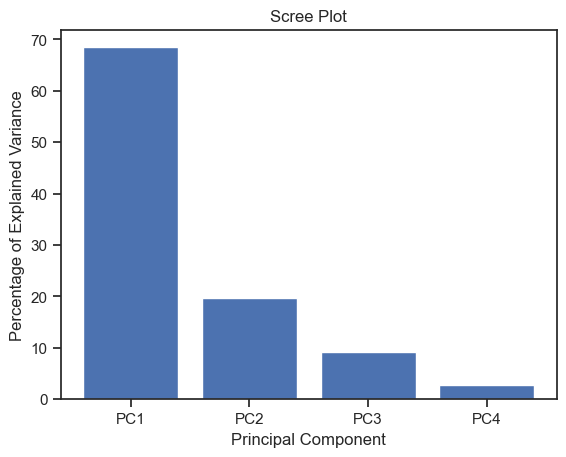

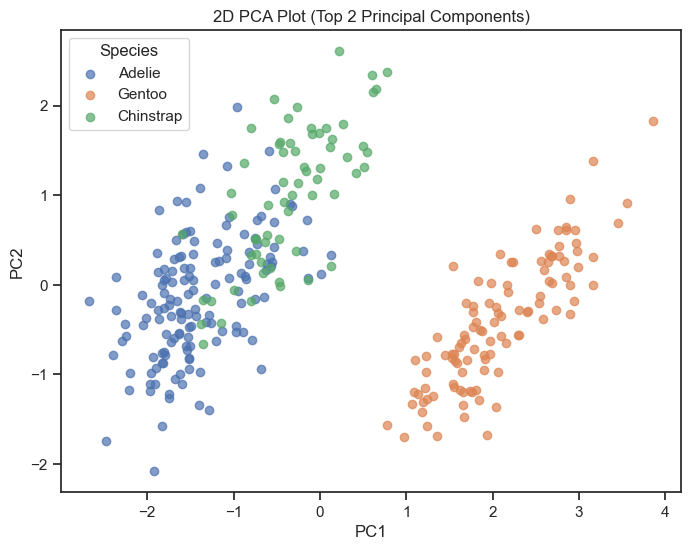

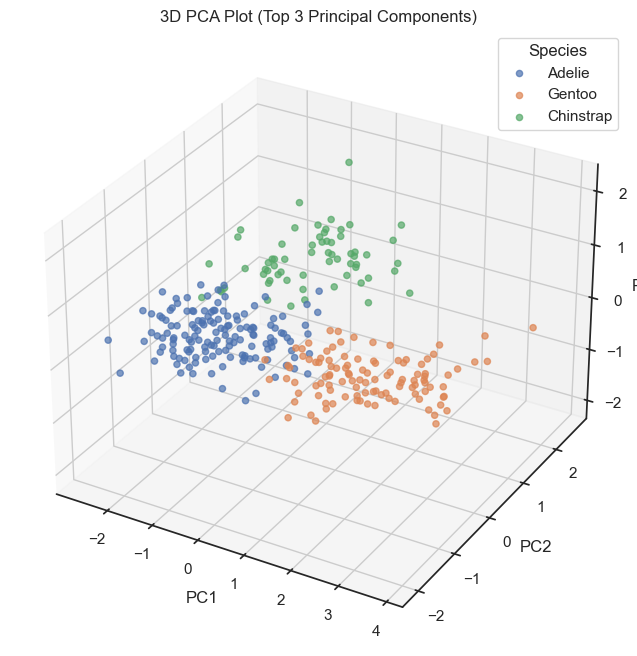

In [64]:
# Select and scale the PCA-relevant features directly
pca_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
scaled_data = preprocessing.scale(data[pca_features])

# Perform PCA
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

# Scree Plot: variance explained by each principal component
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]

plt.bar(x=range(1, len(per_var) + 1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()



# 2D Plot using the top 2 principal components with different colors for each species
plt.figure(figsize=(8, 6))
for sp in unique_species:
    subset = pca_data[species == sp]
    plt.scatter(subset[:, 0], subset[:, 1], label=sp, alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('2D PCA Plot (Top 2 Principal Components)')
plt.legend(title="Species")
plt.show()

# 3D Plot using the top 3 principal components with different colors for each species
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for sp in unique_species:
    subset = pca_data[species == sp]
    ax.scatter(subset[:, 0], subset[:, 1], subset[:, 2], label=sp, alpha=0.7)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D PCA Plot (Top 3 Principal Components)')
ax.legend(title="Species")
plt.show()

#### Discuss your results? In terms of classification, compare the results from pca vs part 1 subplots? Does PCA helps us to classify better or not? Explain it. 

The PCA analysis reveals a marked improvement in species separation compared to the raw feature subplots from Part 1. While certain raw feature combinations, such as Flipper Length vs. Body Mass and Bill Length vs. Bill Depth, exhibited effective clustering, others experienced significant overlap that hindered classification. In contrast, PCA transforms the data into components that maximize variance, resulting in clearer and more distinctly separated clusters in both 2D and 3D visualizations. These plots illustrate that PCA effectively reduces dimensional overlap, enhances separability, and retains 95% of the dataset's variance using just three components. This systematic reduction of redundancy and noise positions PCA as a powerful tool for enhancing classification accuracy and visualization, surpassing the effectiveness of relying solely on raw feature combinations.

Your Answer:

## Part 3 Kmeans  (15 Points)
Apply Kmeans to the PCA Data and plot the results <br>
Your code:

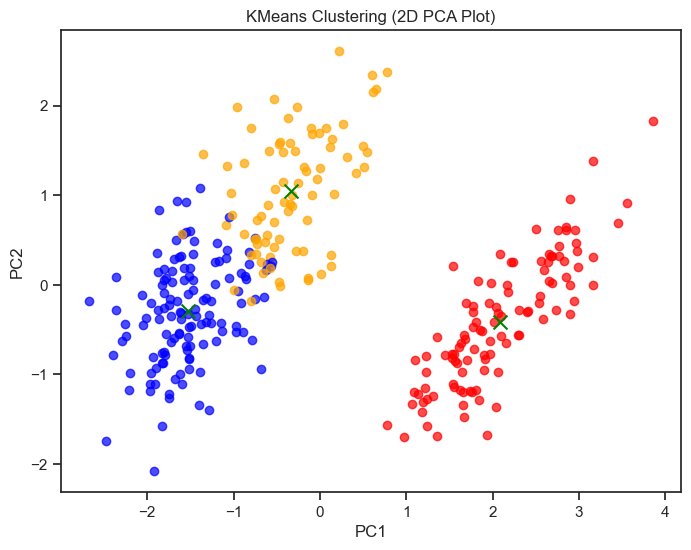

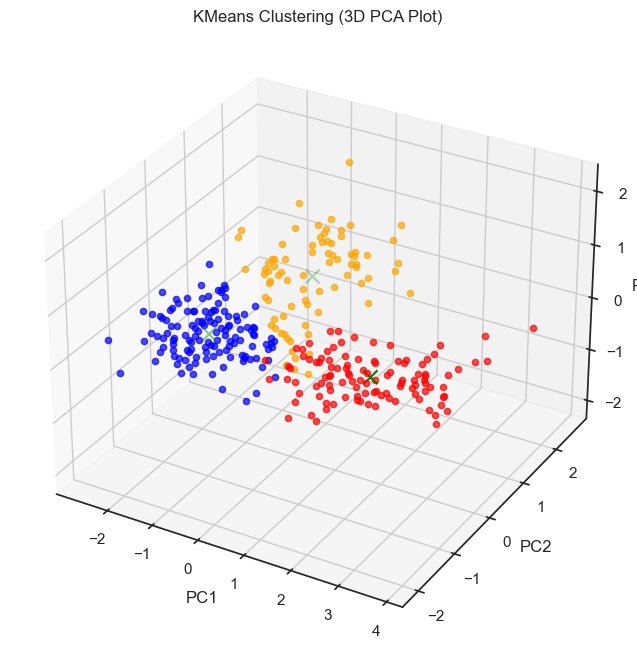

In [30]:
# KMeans training with 3 clusters (one for each species)
kmeans = KMeans(n_clusters=3, random_state=0, max_iter=300)
kmeans.fit(pca_data)

# Get cluster labels
cluster_labels = kmeans.labels_

# 2D Plot of KMeans clustering using your code style
plt.figure(figsize=(8, 6))
for i in range(len(pca_data)):
    if kmeans.labels_[i] == 0:
        plt.scatter(pca_data[i, 0], pca_data[i, 1], color='blue', alpha=0.7)
    elif kmeans.labels_[i] == 1:
        plt.scatter(pca_data[i, 0], pca_data[i, 1], color='red', alpha=0.7)
    elif kmeans.labels_[i] == 2:
        plt.scatter(pca_data[i, 0], pca_data[i, 1], color='orange', alpha=0.7)

# Plot cluster centers for 2D
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, marker='x', c='green')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KMeans Clustering (2D PCA Plot)')
plt.show()

# 3D Plot of KMeans clustering using your code style
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for i in range(len(pca_data)):
    if kmeans.labels_[i] == 0:
        ax.scatter(pca_data[i, 0], pca_data[i, 1], pca_data[i, 2], color='blue', alpha=0.7)
    elif kmeans.labels_[i] == 1:
        ax.scatter(pca_data[i, 0], pca_data[i, 1], pca_data[i, 2], color='red', alpha=0.7)
    elif kmeans.labels_[i] == 2:
        ax.scatter(pca_data[i, 0], pca_data[i, 1], pca_data[i, 2], color='orange', alpha=0.7)

# Plot cluster centers for 3D
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=100, marker='x', c='green')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('KMeans Clustering (3D PCA Plot)')
plt.show()


#### Discuss your results? Are you able to seperate all the species correctly with Kmeans? 

The KMeans clustering on PCA-transformed data formed distinct groups but did not perfectly separate all species, as overlap between clusters remains, particularly for similar species like Adelie and Chinstrap penguins. The 3D plot using three principal components shows slightly better separation than the 2D plot, but some misclassifications persist. This is expected because KMeans, as an unsupervised algorithm, relies solely on data patterns without species labels. While PCA enhances clustering by reducing dimensions and emphasizing variance, the intrinsic overlap in features limits perfect separation. Supervised methods would likely achieve more accurate classification.

Your Answer:

## Part 4 Neural Network  (15 Points)
Use neural network based classifier to find the members of each spicies using the best principal components from part 2. <br>
#### Discuss your results? Are you able to seperate all the species correctly with Neural Networks?  <br>
Your Code:

              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        42
      Gentoo       1.00      1.00      1.00        32
   Chinstrap       1.00      0.95      0.98        21

    accuracy                           0.99        95
   macro avg       0.99      0.98      0.99        95
weighted avg       0.99      0.99      0.99        95



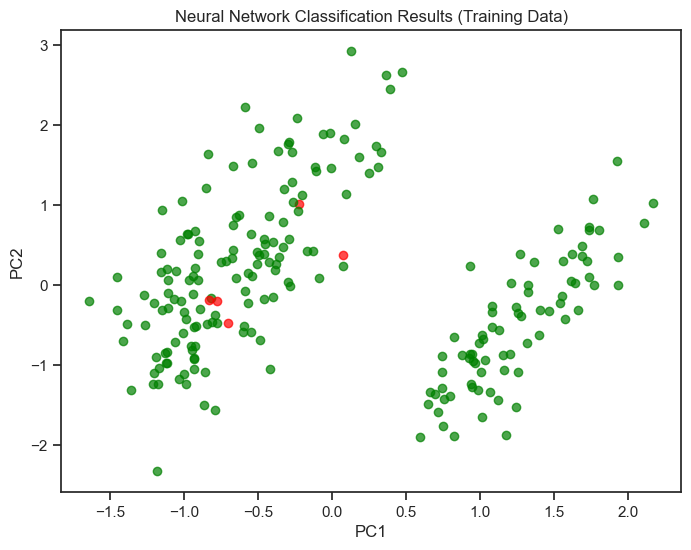

In [66]:


# Continue preparing the data
scaler = StandardScaler()
X = pca_data[:, :3]  
y = data['species']  

species_mapping = {species: idx for idx, species in enumerate(y.unique())}
y_encoded = y.map(species_mapping)
training_X, test_X, training_Y, test_Y = train_test_split(X, y_encoded, test_size=0.3, random_state=42)
scaler.fit(training_X)
training_X = scaler.transform(training_X)
test_X = scaler.transform(test_X)

# Neural network with hidden layers
nn = MLPClassifier(
    solver='sgd',
    learning_rate='constant',
    learning_rate_init=0.001,
    hidden_layer_sizes=(20, 50),
    max_iter=200,
    random_state=1
)
nn.fit(training_X, training_Y)
predicted_Y = nn.predict(test_X)
print(classification_report(test_Y, predicted_Y, target_names=species_mapping.keys()))

# Plotting
plt.figure(figsize=(8, 6))
for i in range(len(training_X)):
    ans = nn.predict([training_X[i]])
    if ans == training_Y.iloc[i]:
        plt.scatter(training_X[i, 0], training_X[i, 1], color='green', alpha=0.7)  # Correct classification
    else:
        plt.scatter(training_X[i, 0], training_X[i, 1], color='red', alpha=0.7)  # Incorrect classification
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Neural Network Classification Results (Training Data)')
plt.show()


The neural network classifier achieved near-perfect accuracy, effectively separating all three penguin species using the top 3 principal components. The classification report indicates an overall accuracy of 99%, with minimal or no misclassifications, as reflected by the green markers in the training data plot. The PCA-transformed features provided clear separability, enabling the neural network to learn patterns efficiently. Compared to KMeans, the neural network significantly outperformed by leveraging labeled data and creating non-linear decision boundaries. 

## Part 5 Graduate Student (40 Points)

This time we will not use the 'species' feature but will use the 'sex' feature for the classification. From the features bill length_mm, bill_depth_mm, flipper_length_mm,  body_mass_g, you will determine whether the penguin is male or female. 
You will develop Logistic Regression, Decision Tree and Neural Networks to classify using 'sex' feature. Split your data 80/20 way(80% of the data for training and 20% for testing). Compare the accuracies of these classification methods and discuss the results. Draw a table(See the sample code below) <br>
Table example:

In [4]:
import pandas as pd
data = [[0.65, 0.89 , 0.76]]
pd.DataFrame(data, columns=["Logistic Regression", "Decision Tree", "Neural Network"])

,Logistic Regression,Decision Tree,Neural Network
0,0.65,0.89,0.76


In [59]:

data = pd.read_csv(r'penguins.csv')
print(data.shape)
data_cleaned = data.dropna(subset=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex'])

X = data_cleaned[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
y = data_cleaned['sex']

y_encoded = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression
log_reg = LogisticRegression(max_iter=200, random_state=42)
log_reg.fit(X_train, y_train)
log_reg_preds = log_reg.predict(X_test)
log_reg_accuracy = accuracy_score(y_test, log_reg_preds)

# Decision Tree
dec_tree = DecisionTreeClassifier(random_state=42)
dec_tree.fit(X_train, y_train)
dec_tree_preds = dec_tree.predict(X_test)
dec_tree_accuracy = accuracy_score(y_test, dec_tree_preds)

# Neural Network
nn_sex = MLPClassifier(
    solver='sgd',
    learning_rate='constant',
    learning_rate_init=0.001,
    hidden_layer_sizes=(20, 50),
    max_iter=200,
    random_state=42
)
nn_sex.fit(X_train, y_train)
nn_sex_preds = nn_sex.predict(X_test)
nn_sex_accuracy = accuracy_score(y_test, nn_sex_preds)

comparison_data = [[log_reg_accuracy, dec_tree_accuracy, nn_sex_accuracy]]
accuracy_table = pd.DataFrame(comparison_data, columns=["Logistic Regression", "Decision Tree", "Neural Network"])

print("Accuracy Comparison of Classification Methods:")

print(accuracy_table)



(344, 9)
Accuracy Comparison of Classification Methods:
   Logistic Regression  Decision Tree  Neural Network
0                0.875         0.8125         0.84375


## Part 6 Bonus

This is a section that you can use your abilities and imigination to add to this project. Please write a paragraph for anything that you  add extra and the summary/results of your work.

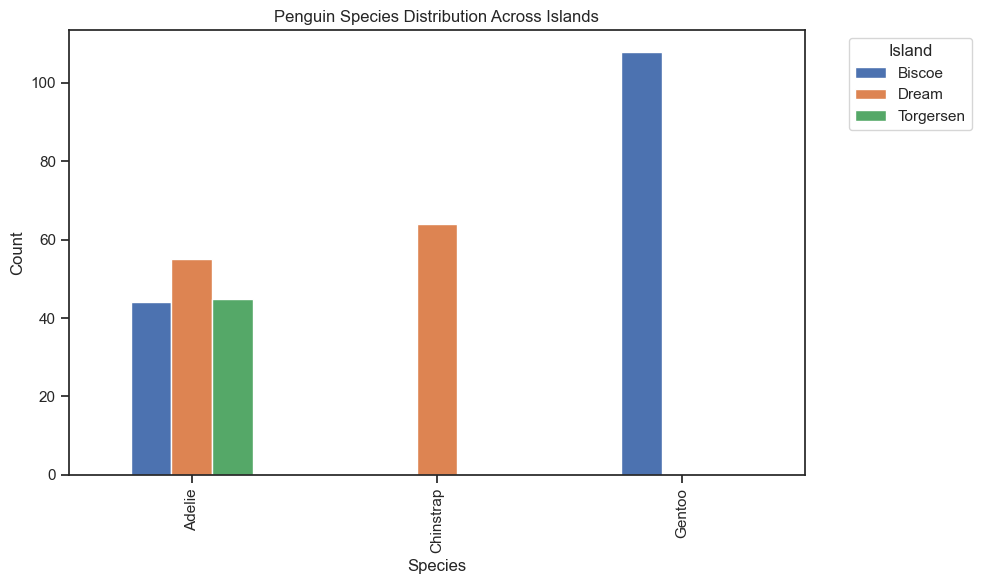

Average Body Mass and Flipper Length by Species and Island
                     body_mass_g  flipper_length_mm
species   island                                   
Adelie    Biscoe     3709.659091         188.795455
          Dream      3701.363636         189.927273
          Torgersen  3688.888889         191.422222
Chinstrap Dream      3735.156250         195.703125
Gentoo    Biscoe     5078.472222         217.083333


In [58]:

# Group the data by species and island and count occurrences
species_island_distribution = data_cleaned.groupby(['species', 'island']).size().unstack()

species_island_distribution.plot(kind='bar', figsize=(10, 6))
plt.title('Penguin Species Distribution Across Islands')
plt.ylabel('Count')
plt.xlabel('Species')
plt.legend(title='Island', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Calculate average body mass and flipper length for each species across islands
avg_features = data_cleaned.groupby(['species', 'island'])[['body_mass_g', 'flipper_length_mm']].mean()
print("Average Body Mass and Flipper Length by Species and Island")
print(avg_features)


This analysis explores the distribution of penguin species across three islands (Biscoe, Dream, and Torgersen) and examines variations in their physical characteristics. A bar chart reveals clear habitat preferences among species: Adelie penguins are distributed across all three islands, Gentoo penguins are concentrated on Biscoe Island, and Chinstrap penguins predominantly inhabit Dream Island. This suggests that each species may have unique ecological preferences.